# **Plant Nutrition Predicition Model**

**Name: Radyatra Sidharta**

### Table of Contents
- I. Introduction
- II. External Links
- III. Working Area
    - a. Library Import
    - b. Exploratory Data Analysis (EDA)
    - c. Feature Engineering
    - d. Modeling
    - e. Pipeline
- IV. Conclusion and Further Improvements

## I. Introduction

The purpose of this notebook is to create a regression machine learning model to predict on plant nutritional data with the following criteria:

- Able to create a prediction model of plant nutritional data that has been obtained from the test lab.
- Able to explore and analyze the datasets.
- Able to explain how to evaluate the model.
- Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
- Able to provide further improvement plan.

## II. External Links

- Deployment Link: https://radyatra-plant-nutrition-prediction-app-isg92d.streamlit.app

- linkedin.com/in/radyatra-sidharta
- github.com/Radyatra

## III. Working Area

### a. Library Import

In [3]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import phik
import pickle

import warnings
warnings.filterwarnings('ignore')

# For Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For Regression Problems
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
import lightgbm
from lightgbm import LGBMRegressor

# For Feature Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# For Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# For Outlier Handling
from feature_engine.outliers import Winsorizer

# For Dataset Splitting
from sklearn.model_selection import train_test_split

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To Evaluate Regression Model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from tune_sklearn import TuneSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

np.random.seed(42)

### b. Exploratory Data Analysis (EDA)

In [4]:
# Loading the Excel file using pd.read_excel.
df = pd.read_excel('aria_data.xlsx')
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


Our Excel data contains only one sheet and its contents can be seen above. Here, we have columns such as v1 - v8 as well as sample_type that influence the target value in the first column "target." Hence, we will henceforth be calling these columns "features." Unfortunately, there is no further information regarding what data the features v1 - v8 represents. Therefore, we are left with our own interpretations.

The data are of speciments of plants. There are 160 data entries for each of the 10 columns.

In [5]:
# Identifying types of data for each column in our dataset.
df.dtypes

target         float64
v1             float64
v2             float64
v3             float64
v4             float64
v5             float64
v6             float64
v7             float64
v8             float64
sample_type     object
dtype: object

Here we can see the different types of data present in our set. As we can see, there are eight numerical features and one categorical feature. These numerical features are in the form of floats, allowing for decimal points.

In [6]:
# Checking the different categories in our sample_type feature.
df['sample_type'].unique()

array(['lab 1', 'lab 2'], dtype=object)

There are only two types of sample_type in our dataset, describing that the plants originate from either lab 1 or lab 2.

In [7]:
# Checking for nulls in our dataset and summing them for each column.
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Checking Not-a-Number (NaN) values / Nulls is an important step to ensure no errors would occur in our modeling process. From the list above, we can ascertain that there are no Not-a-Number(NaN) / Nulls in our dataset.

In [8]:
# Finding duplicates in our data and sorting them (True will be on top of the list).
df_dupl = df.duplicated()
df_dupl.sort_values(ascending=False) 

0      False
1      False
102    False
103    False
104    False
       ...  
54     False
55     False
56     False
57     False
159    False
Length: 160, dtype: bool

Duplicates enlarges error margins, which should be prevented to create the best possible model. As such, any duplicates should be removed. However, we can see here that we have no duplicates in our dataset. Therefore, we can proceed.

<AxesSubplot:ylabel='target'>

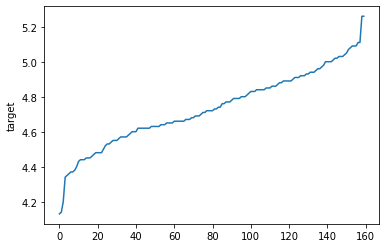

In [9]:
# Displaying line plot for the values in our target.
sns.lineplot(y=df['target'].sort_values(),x=df.index)

From the graph above, we can understand that the target value in our dataset ranges from about 4 - 5.3 in value. Note the increase in its value as the data points increase as well.

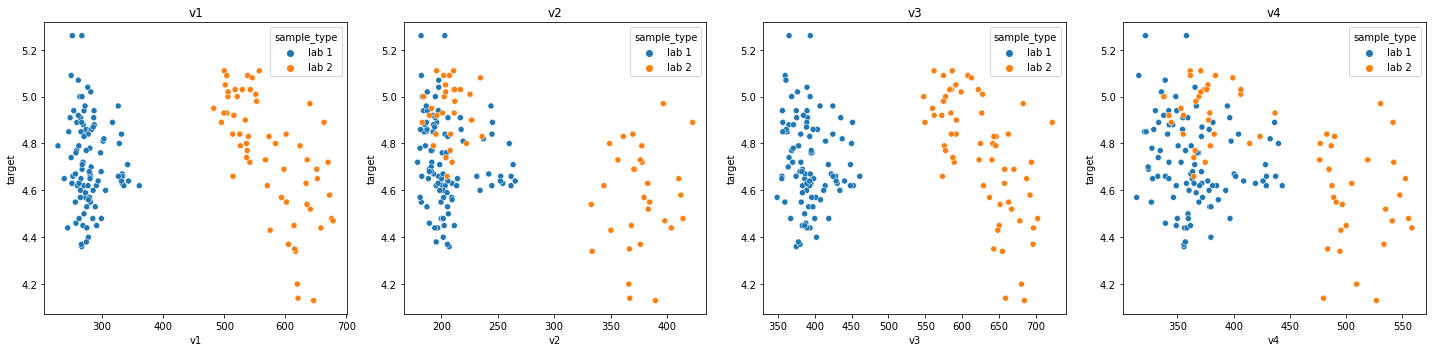

In [10]:
# Configuring scatter plots for checking of our numerical features.
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.scatterplot(y='target', x='v1', data= df, hue='sample_type')
plt.title('v1')

plt.subplot(1,4,2)
sns.scatterplot(y='target', x='v2', data= df, hue='sample_type')
plt.title('v2')

plt.subplot(1,4,3)
sns.scatterplot(y='target', x='v3', data= df, hue='sample_type')
plt.title('v3')

plt.subplot(1,4,4)
sns.scatterplot(y='target', x='v4', data= df, hue='sample_type')
plt.title('v4')

plt.tight_layout()

plt.show()

Checking the scatter plots above, we can observe an interesting pattern for the features v1 and v3, in which plants from sample_type lab 1 and lab 2 could be clearly segmented. V1 values below 450 would indicate that the plant originates from lab 1, whilst a value above 450 would indicate that it originates from lab 2. The trend is the same for the value of v3, in which a value of below 500 would mean the plant originates from lab 1, and vice-versa.

However, for v2 and v4, we can ascertain that some plants from lab 2 can have similar values at that of plants from lab 1, but not the other way around. There is still a clear margin in which sample_type lab 2 plants would reside in, where the values are above 300 and above 450 for v2 and v4 respectively.

In the case of the target vs v1 - v4, there do not seem to be a clear pattern whether the values of those features have a correlation to the target. Although, for v2 and v4, plants that have values of below 300 and below 450 respectively have a target value of only between 4.6 and 5.2.

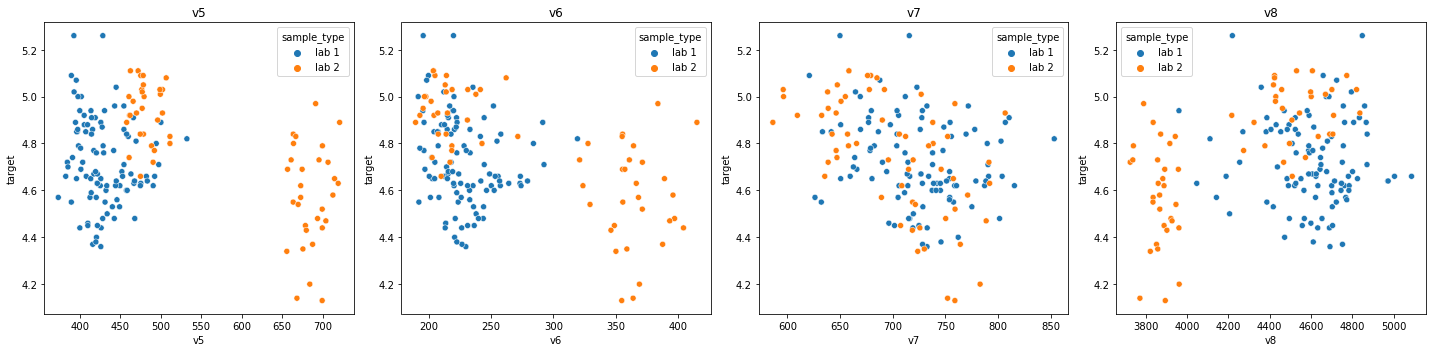

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.scatterplot(y='target', x='v5', data= df, hue='sample_type')
plt.title('v5')

plt.subplot(1,4,2)
sns.scatterplot(y='target', x='v6', data= df, hue='sample_type')
plt.title('v6')

plt.subplot(1,4,3)
sns.scatterplot(y='target', x='v7', data= df, hue='sample_type')
plt.title('v7')

plt.subplot(1,4,4)
sns.scatterplot(y='target', x='v8', data= df, hue='sample_type')
plt.title('v8')

plt.tight_layout()

plt.show()

For the next series of scatter plots, we can ascertain that v5 and v6 are similar in trend to v2 and v4, in which there is a sort of margin between sample_type lab 1 and lab 2, although some plants from lab 2 are clustered amongst those from lab 1. 

On the other hand, for v7 and v7, the story is very much different. There are no discernable patterns for sample_type lab 1 and lab 2, in which the data points seem to be spread out amongst each other. However, for v8, there is a congregation sample_type lab 2s on the left side of the graph, a trend which seems to be reversed from v2, v4, v5, and v6. 

Again, in the case of the target vs v5 - v8, there do not seem to be a clear pattern whether the values of those features have a correlation to the target. Similar to v2 and v4, v5 and v6 have target values of between 4.6 and 5.2 for values of below 550 and below 320 respectively.

### c. Feature Engineering

The Feature Engineering is an important step in the model making process in which we prepare our data for model processing. Failure to do so will result in our model either performing poorly or failing to work completely. 

#### 1. Feature Selection

Feature selection is a process in which features are chosen based on specific assumptions. The reasoning behind this step is usually to lessen the load on computer resources and time when it comes to the creation of our model, not to mention to improve the model itself at times. As such, we could often times find this step redone after the first initial modeling as further improvements.

There are different procedures that can be used to emphasize the correlation between a feature and the target (also called Feature Importance). Here, we will be using two methods: visualizing the correlation through a Phik matrix (heatmap) and using the K-Best Score. Both of these methods are a statistical approach to Feature Selection. Besides statistics, we could also rely on facts and knowledge of our features to base our selection from. However, as seen from our EDA, this could prove quite difficult in this case (because of the lack of information regarding what our features represents).

Afterwards, after we have chosen which features to use from information we obtain during the feature importance process, we would need to check for the multicollinearity of our features. Simply put, multicollinearity is the correlation of our features between one another. It is required for our features to not have any correlation with each other.

The process of checking the feature importance and multicollinearity is a necessary step if we were to use the Logistic Regression and Support Vector Machine models only, as they are sensitive to such problems.

Having said that, it is important to note that we WILL NOT be using the Logistic Regression and Support Vector Machine models. The reasoning behind this is that on another notebook (named "prediction_logreg.ipynb"), the Logistic Regression model yields poor results. Hence, the purpose of the feature selection done here is just as an extension to our EDA.

Instead, we will be using mostly tree-based models / algorithms such as:
- Decision Tree Regressor
- Random Forest Regression
- Boosted Tree-Based Regressors
- Ensemble Models

##### i. Checking Correlation to Target

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


<AxesSubplot:>

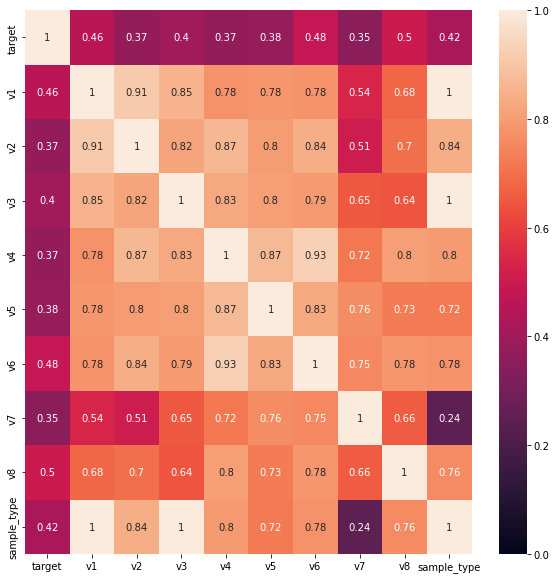

In [12]:
# Checking Feature Importance through the Phik Matrix
plt.figure(figsize=(10, 10)) # Figure size.
sns.heatmap(df.phik_matrix(), vmin = 0, vmax = 1, annot = True) # In this case, our range for the correlation coefficient is 0 to 1.

The Phik Matrix is a useful tool to check any correlation between our features to the target. Its output coefficient value only ranges from 0 to 1, where the interpretation is as follows:

- Correlation coefficients between 0.9 and 1.0 = Very high correlation
- Correlation coefficients between 0.7 and 0.9 = High correlation
- Correlation coefficients between 0.5 and 0.7 = Moderate correlation
- Correlation coefficients between 0.3 and 0.5 = Low correlation
- Correlation coefficients below 0.3 = Weak to no correlation

In conclusion, we would like to retain features that have a correlation coefficient of 0.3 or above. Therefore, we could ascertain that all features would be retained.

However, looking closer, we could also observe that the features also has a strong correlation with each other. We would check this in more detail later on with a specific process.

In [13]:
# Using K-Best Score test to check Feature Importance.
df_num = df.drop(['target', 'sample_type'], axis=1) 
df_cat = df[['sample_type']]
df_targ = df[['target']]

In [14]:
# Defining scaler.
scaler = MinMaxScaler()

# Fitting features to be scaled. 
scaler.fit(df_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']])

# Scaling features.
df_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']] = scaler.transform(df_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']])

# Conversion to dataframe.
df_num_scaled = pd.DataFrame(df_num)

In [15]:
# Encoder function to tranform data type string (non-numeric) to numerical form in specific columns
ohe = OneHotEncoder() # One Hot Encoder is used because our categories are not ranking / level based, rather that of different types.

# Fitting categorical columns.
ohe.fit(df_cat)

# Transforming categorical columns.
df_nom_encoded = ohe.transform(df_cat).toarray()

# Conversion to dataframe.
df_nom_encoded = pd.DataFrame(df_nom_encoded)

In [16]:
# Joining / concat the scaled and encoded dataframes.
df_full = pd.concat([df_num_scaled,df_nom_encoded,df_targ], axis=1)

In [17]:
# Finding the K-Best Score for each of our features.
K_best = SelectKBest(k='all')
train_K_best = K_best.fit(df_full.drop(columns='target', axis=1), df_full['target'])
K_best_scores = np.round_(train_K_best.scores_)

df_K_best_Scores = pd.Series(K_best_scores)
df_K_best_Scores.index = df_full.drop(columns='target', axis=1).columns
df_K_best_Scores.sort_values(ascending=False)

v1    1.0
v2    1.0
v3    1.0
v4    1.0
v5    1.0
v6    1.0
v7    1.0
v8    1.0
0     1.0
1     1.0
dtype: float64

The K-Best Score method is an interesting procedure to check feature importance as it requires the user to set their own boundaries when it comes to which features to retain and which to drop. In this case, we could see that all our features have a correlation to the target, with each having the same degree of correlation to it. Therefore, we could only draw the conclusion of retaining all our features.

##### ii. Checking for Multicollinearity

We will be using the Variance Inflation Factor (VIF) test to determine whether our features have multicollinearity.

In [18]:
ord = OrdinalEncoder() # We are using Ordinal Encoder here as the VIF test does not work with the One Hot Encoder.

ord.fit(df_cat[['sample_type']])

df_cat[['sample_type']] = ord.transform(df_cat[['sample_type']])

vif_cat = pd.DataFrame(df_cat)

In [19]:
df_vif = pd.concat([df_num_scaled,vif_cat], axis=1)

In [20]:
# Conducting VIF test for multicollinearity checking.
vif_test = df_vif
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature         VIF
0           v1  178.920739
1           v2   78.050300
2           v3  327.753541
3           v4  131.279300
4           v5  166.466807
5           v6   88.651054
6           v7   39.437320
7           v8   12.164890
8  sample_type  263.807355


The VIF score is interpreted as follows:

- 1 = Not correlated
- 1 to 10 = Moderately correlated
- More than 10 = Highly correlated

It would seem all of our features have a high correlation towards one another. To mitigate this, we must remove the feature that have the highest VIF score and keep doing so until all VIF scores are below 10.

In [21]:
df_vif1 = df_vif.drop(['v3'], axis = 1)

In [22]:
vif_test = df_vif1
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature         VIF
0           v1  178.340955
1           v2   77.920168
2           v4   90.995113
3           v5  149.596298
4           v6   83.395410
5           v7   38.239201
6           v8   11.962488
7  sample_type  105.386023


In [23]:
df_vif2 = df_vif1.drop(['v1'], axis = 1)

In [24]:
vif_test = df_vif2
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature         VIF
0           v2   70.734099
1           v4   87.100026
2           v5  147.502789
3           v6   82.587925
4           v7   38.210175
5           v8   10.523882
6  sample_type   17.455936


In [25]:
df_vif3 = df_vif2.drop(['v5'], axis = 1)

In [26]:
vif_test = df_vif3
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature        VIF
0           v2  58.370698
1           v4  86.105189
2           v6  69.580530
3           v7  34.367304
4           v8  10.149516
5  sample_type   5.357826


In [27]:
df_vif4 = df_vif3.drop(['v4'], axis = 1)

In [28]:
vif_test = df_vif4
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature        VIF
0           v2  45.097993
1           v6  65.172232
2           v7  24.240803
3           v8  10.028097
4  sample_type   3.240153


In [29]:
df_vif5 = df_vif4.drop(['v6'], axis = 1)

In [30]:
vif_test = df_vif5
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature        VIF
0           v2   8.179015
1           v7  14.598081
2           v8   8.710709
3  sample_type   3.235371


In [31]:
df_vif6 = df_vif5.drop(['v7'], axis = 1)

In [32]:
vif_test = df_vif6
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

       Feature       VIF
0           v2  2.371154
1           v8  1.167904
2  sample_type  2.411062


We have now retained features that have little correlation to one another (which is still considered acceptable). These features are that listed above. However, as stated in the beginning of this procedure, we would not be using this information ahead.

#### 2. Dataset Splitting

It is important to split our dataset into a train and test set, in which our model will be learning the patterns in our train set, and make predictions using our test set. Crucially, this step is done as early as possible to prevent data leakage. This would mean that we are trying to prevent our model from being familiar with the test set before it is used in the prediction phase. If data leakage were to happen, then our model would falsely be accurate in its predictions. In this situation, our model would perform poorly using live data. The splitting of our features from our target is done as a requirement for our models.

In [33]:
# Splitting features from target.
X = df.drop(['target'], axis=1) 
y = df['target']

# Splitting dataset between Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7) # Train size would be 70% of whole dataset, whilst Test size is 30%.

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)

X_Train Size :  (112, 9)
X_Test Size  :  (48, 9)
y_Train Size :  (112,)
y_Test Size  :  (48,)


In [34]:
X_train_num = X_train.drop(['sample_type'], axis=1)
X_train_cat = X_train[['sample_type']]

X_test_num = X_test.drop(['sample_type'], axis=1)
X_test_cat = X_test[['sample_type']]

As seen above, we have successfully split our datasets into features "X" and target "y" as well as into the Train and Test sets. In addition, the features in our train and test sets have been split further into numerical and categorical sets. This is done because there are differing methods done to prepare these data for modeling.

#### 3. Feature Encoding

Feature Encoding is an important step to convert our non-numerical values into numerical form, since our model will not be able to interpret the data in its original string form. Here, we are using One Hot Encoder to encode our categorical features since our variables comprises a finite set of discrete values with no relationship between the values (in other terms, they are not ranking / level based). One Hot Encoding also makes our training data more useful and expressive, and it can be rescaled easily.

In [35]:
ohe = OneHotEncoder()

ohe.fit(X_train_cat)

X_train_encoded = ohe.transform(X_train_cat).toarray()
X_test_encoded = ohe.transform(X_test_cat).toarray()

X_train_encoded = pd.DataFrame(X_train_encoded)
X_test_encoded = pd.DataFrame(X_test_encoded)

#### 4. Feature Scaling

Feature scaling is another important step in allowing our models to interpret the data with ease as it limits the range of the values of our data entries. There are three scaling methods to choose from, namely: Standard Scaling (Standardization), Min-Max Scaling, and Robust Scaling. 

Standard Scaling is usually used for numerical data that is normally distributed, whilst Min-Max and Robust Scaling are used when we have skewed data. What is differs Min-Max and Robust Scaling is the ability of Robust Scaler to reduce the influence of outliers. 

We will need to check for outliers to determine which scaling method to use. 

##### i. Checking for Outliers

In [36]:
# Function to create histogram and boxplot.
def diagnostic_plots(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # Histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # Boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=3)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show() # Displaying Plot
    
    # Skewness and Kurtosis
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))

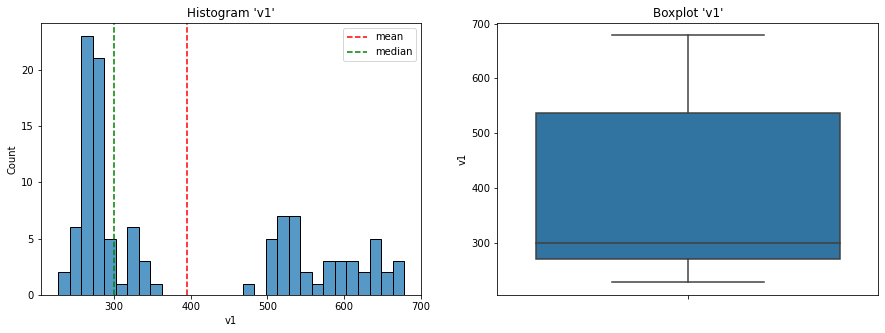

v1 Skewness: 0.5634949170348501
Columns 'v1' right skewed
v1 Kurtosis: -1.4049231349126046


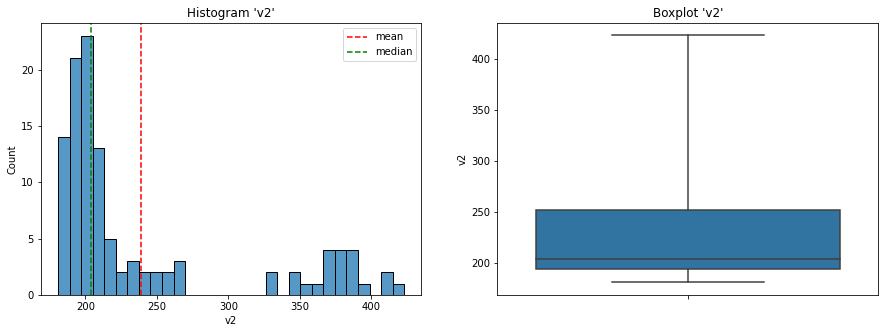

v2 Skewness: 1.405784065260136
Columns 'v2' right skewed
v2 Kurtosis: 0.3848093486637203


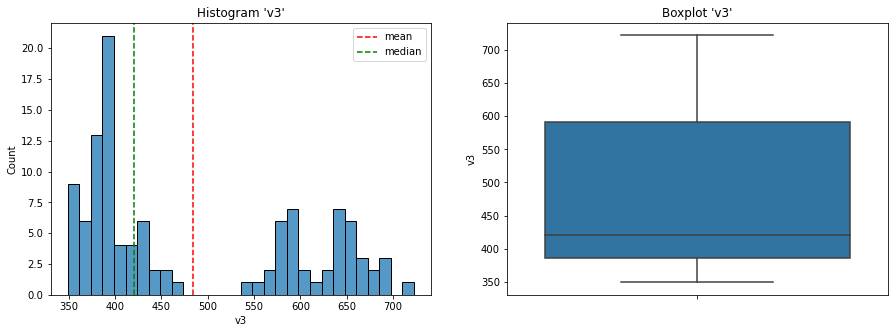

v3 Skewness: 0.5192104124595218
Columns 'v3' right skewed
v3 Kurtosis: -1.442165415141536


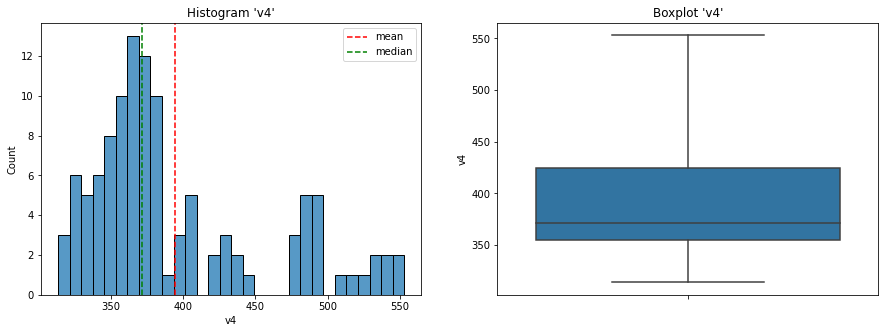

v4 Skewness: 1.0764105777879316
Columns 'v4' right skewed
v4 Kurtosis: 0.0526279852526188


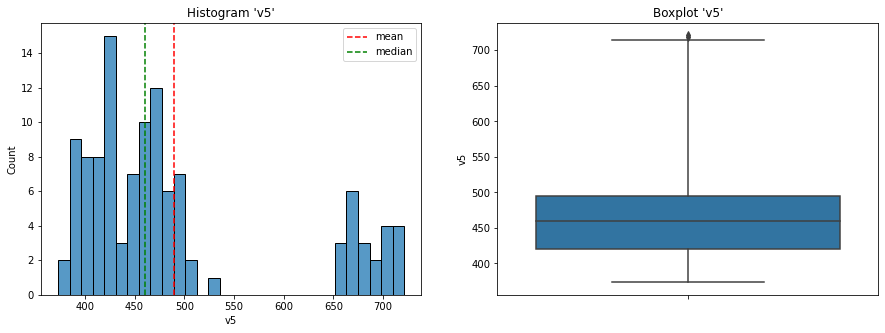

v5 Skewness: 1.2233937511366026
Columns 'v5' right skewed
v5 Kurtosis: 0.050948801769636454


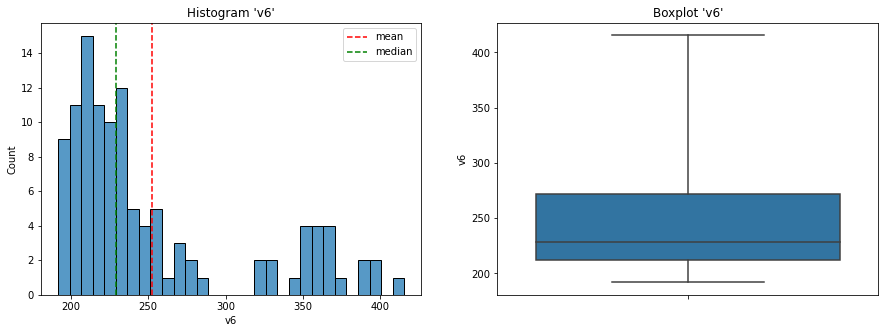

v6 Skewness: 1.2402913216513463
Columns 'v6' right skewed
v6 Kurtosis: 0.18382415692199583


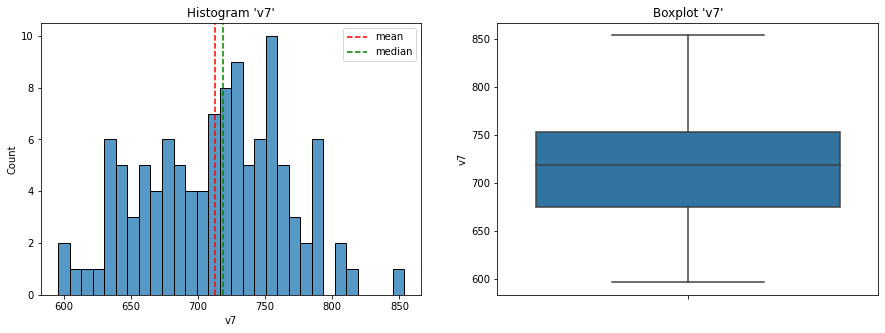

v7 Skewness: -0.08562172001995234
Columns 'v7' normal distribution
v7 Kurtosis: -0.46871655723605654


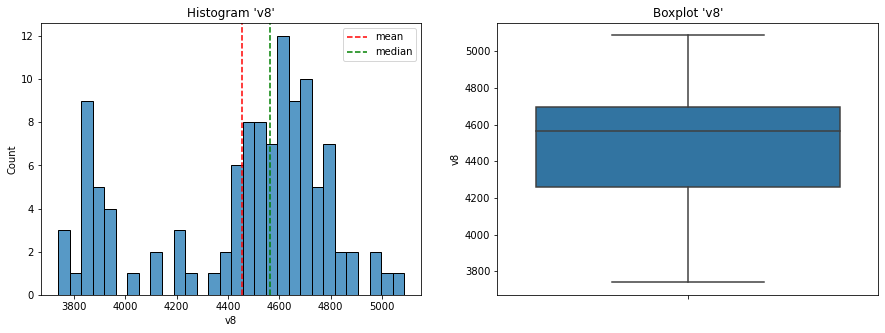

v8 Skewness: -0.7528225983640571
Columns 'v8' left skewed
v8 Kurtosis: -0.5552318622587609


In [37]:
# For loop to create visualization for all features.
for variable in X_train_num.columns:
    diagnostic_plots(X_train_num,variable)

Only the skewness value is used to ascertain whether or not a feature has skewed data or not. The interpretation of its values is as follows:

- 0 to 0.5 or 0 to -0.5 = Normally Distributed
- 0.5 to 1 or -0.5 to -1 = Moderately Skewed
- Beyond 1 or -1 = Highly Skewed

From the histograms and boxplots above, we could ascertain that most of our numerical features are moderately or heavily skewed (only feature v7 being normally distributed), and mostly to the right. As such, we could choose from using one of two scalers: Min-Max or Robust Scaler.

Comparing these histograms with the scatter plots in our EDA however, would turn up an interesting fact. Features v1 - v6 are all skewed to the right, with outliers positioned in higher ranges of their values. When we look back at the scatter plots in the EDA, we could observe that those outliers are that of sample_type lab 2. In an effort to not reduce the influence / information retention of that sample_type, we will be using the Min-Max Scaler.

##### ii. Scaling

In [38]:
scaler = MinMaxScaler()

scaler.fit(X_train_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']])

X_train_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']] = scaler.transform(X_train_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']])
X_test_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']] = scaler.transform(X_test_num[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']])

X_train_scaled = pd.DataFrame(X_train_num)
X_test_scaled = pd.DataFrame(X_test_num)

#### 5. Dataset Compiling

The last step in our feature engineering process is to join together the numerical and categorical features that we have split before, pending their input into the model.

In [39]:
X_train_final = pd.concat([X_train_encoded.reset_index(drop=True),X_train_scaled.reset_index(drop=True)],axis=1)
X_test_final = pd.concat([X_test_encoded.reset_index(drop=True),X_test_scaled.reset_index(drop=True)],axis=1)

### d. Modeling

#### 1. Decision Tree Regressor

We now move into the first process in creating our model: Defining the model and selecting its parameters. For selecting the parameters, we use Grid-Search CV, which is a process that allows our model to train on different parameters we have set for it to determine which of them yields the best results.

In [63]:
# Grid-Search Cross Validation using TuneSearchCV

# Parameters to be tested.
param_grid_dcs = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter' : ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 10], 'min_samples_leaf' : [0.01, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6]}

# Defining Model to be used.
dcs_gridcv = TuneSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_grid_dcs)

# Training.
dcs_gridcv.fit(X_train_final, y_train)

# Printing best hyperparameters.
print(dcs_gridcv.best_params_)

(_Trainable pid=20972) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=20972)   warnings.warn(
(_Trainable pid=20972) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=20972)   warnings.warn(
(_Trainable pid=20972) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=20972)   warnings.warn(
(_Trainable pid=20972) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only

{'criterion': 'poisson', 'splitter': 'best', 'max_depth': 1, 'min_samples_leaf': 1}


In [87]:
dcs = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'random', max_depth = 3, min_samples_leaf = 6)

In [88]:
# Training our model.
dcs.fit(X_train_final, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=6,
                      splitter='random')

In [89]:
# Using the predicted values from our features in the train and test sets to get the Mean Absolute Error (MAE), Mean Squared Error (MSE), and
# Root Mean Squared Error (RMSE).

y_pred_train_dcs = dcs.predict(X_train_final)
y_pred_test_dcs = dcs.predict(X_test_final)

print('MAE Train = ', mean_absolute_error(y_train, y_pred_train_dcs))
print('MAE Test = ', mean_absolute_error(y_test, y_pred_test_dcs))
print('')
print('MSE Train = ', mean_squared_error(y_train, y_pred_train_dcs))
print('MSE Test = ', mean_squared_error(y_test, y_pred_test_dcs))
print('')
print('RMSE Train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_dcs)))
print('RMSE Test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_dcs)))

MAE Train =  0.13464501842403628
MAE Test =  0.16503199404761917

MSE Train =  0.02817270248724488
MSE Test =  0.04261758874687029

RMSE Train =  0.16784725939747983
RMSE Test =  0.2064402788868255


Interpretation of results:

- The Mean Absolute Error (MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

- Mean Squared Error (MSE) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

- Root Mean Squared Error (RMSE) is the square root of Mean Squared Error. It measures the standard deviation of residuals.

Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors, such as that of the Mean Absolute Error. However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the target variable (y-axis).

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.

Reference: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

R-Squared is another metric that is usually used for regression models. However, we will not be using it here due to the non-linear nature of our data. In addition, we are aiming to compare the accuracy among different regression models, which makes RMSE a better choice than R Squared.

Text(0.5, 1.0, 'Decision Tree Regressor')

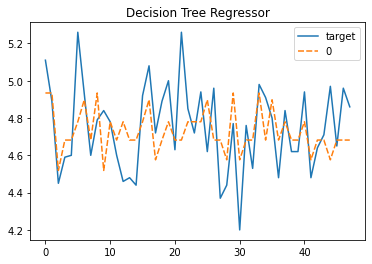

In [94]:
plot_dcs= pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),pd.DataFrame(y_pred_test_dcs)],axis=1)
sns.lineplot(data=plot_dcs)
plt.title('Decision Tree Regressor')

We will only be looking at the RMSE score and line plot of the test set. To put the RMSE into context, we could understand from the results above that we have an error of 0.206 for every prediction made by the model. For example, if the real value of our target is 4.8, then our model could predict a value below or above that number by 0.206. This is a simplification of what the RMSE could represent. The line graph here is to visualize and compare the real and predicted values for the test set.

#### 2. Random Forest Regressor

In [71]:
param_grid_rnd = {'n_estimators': [10, 20, 30, 50, 100, 200, 300], 'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 10], 'max_features' : ['sqrt', 'log2'], 'min_samples_leaf' : [0.01, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6]}

rnd_gridcv = TuneSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_grid_rnd)

rnd_gridcv.fit(X_train_final, y_train)

print(rnd_gridcv.best_params_)

(_Trainable pid=42004) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=42004)   warnings.warn(
(_Trainable pid=18800) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=18800)   warnings.warn(
(_Trainable pid=39676) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=39676)   warnings.warn(
(_Trainable pid=12676) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only

{'n_estimators': 50, 'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 5}


In [72]:
# Defining model using Random Forest Regressor
rnd = RandomForestRegressor(n_estimators = 50, criterion = 'friedman_mse', max_depth = 4, max_features = 'log2', min_samples_leaf = 5, random_state=42)

In [73]:
rnd.fit(X_train_final, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', min_samples_leaf=5, n_estimators=50,
                      random_state=42)

In [74]:
y_pred_train_rnd = rnd.predict(X_train_final)
y_pred_test_rnd = rnd.predict(X_test_final)

print('MAE Train = ', mean_absolute_error(y_train, y_pred_train_rnd))
print('MAE Test = ', mean_absolute_error(y_test, y_pred_test_rnd))
print('')
print('MSE Train = ', mean_squared_error(y_train, y_pred_train_rnd))
print('MSE Test = ', mean_squared_error(y_test, y_pred_test_rnd))
print('')
print('RMSE Train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_rnd)))
print('RMSE Test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_rnd)))

MAE Train =  0.11442063112546694
MAE Test =  0.15573289206393773

MSE Train =  0.019615315355287162
MSE Test =  0.03859428725211846

RMSE Train =  0.14005468701649068
RMSE Test =  0.1964542879453601


The Random Forest Regressor has a RMSE score of 0.196. A slight improvement of the Decision Tree Regressor model.

Text(0.5, 1.0, 'Random Forest Regressor')

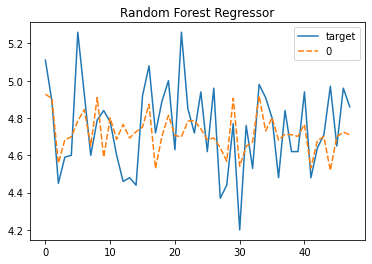

In [51]:
plot_rnd= pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),pd.DataFrame(y_pred_test_rnd)],axis=1)
sns.lineplot(data=plot_rnd)
plt.title('Random Forest Regressor')

#### 3. XGBoost Regression

In [73]:
param_grid_xgb = {'n_estimators': [10, 20, 30, 50, 100, 200, 300], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 10], 'eta' : [0.01, 0.1, 0.2, 0.3, 0.5], 'subsample' : [0.01, 0.1, 0.2, 0.5, 0.7, 1], 'colsample_bytree' : [0.01, 0.1, 0.2, 0.5, 0.7, 1]}

xgb_gridcv = TuneSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=param_grid_xgb)

xgb_gridcv.fit(X_train_final, y_train)

print(xgb_gridcv.best_params_)

(_Trainable pid=8520) c:\Users\radya\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
(_Trainable pid=8520)   from pandas import MultiIndex, Int64Index
(_Trainable pid=8520) c:\Users\radya\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
(_Trainable pid=8520)   elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
(_Trainable pid=33656) c:\Users\radya\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
(_Trainable pid=33656)   from pandas import MultiIndex, Int64Index
(_Trainable pid=33656) c:\Users\radya\anaconda3\lib\site-pac

{'n_estimators': 50, 'max_depth': 1, 'eta': 0.2, 'subsample': 0.5, 'colsample_bytree': 0.1}


In [95]:
# Defining model using XGBoost Regressor
xgb = XGBRegressor(n_estimators = 50, max_depth = 1, eta = 0.2, subsample = 0.5, colsample_bytree = 0.1)

In [96]:
xgb.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, enable_categorical=False,
             eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000003,
             max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_pred_train_xgb = xgb.predict(X_train_final)
y_pred_test_xgb = xgb.predict(X_test_final)

print('MAE Train = ', mean_absolute_error(y_train, y_pred_train_xgb))
print('MAE Test = ', mean_absolute_error(y_test, y_pred_test_xgb))
print('')
print('MSE Train = ', mean_squared_error(y_train, y_pred_train_xgb))
print('MSE Test = ', mean_squared_error(y_test, y_pred_test_xgb))
print('')
print('RMSE Train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('RMSE Test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))

MAE Train =  0.12432110530989504
MAE Test =  0.1646485066413879

MSE Train =  0.022533650042837004
MSE Test =  0.04255269511075077

RMSE Train =  0.1501121249028106
RMSE Test =  0.2062830461059531


The XGBoost Regression model has a RMSE score of 0.206. As such, the Random Forest Regressor still holds the best model spot.

Text(0.5, 1.0, 'XGBoost Regression')

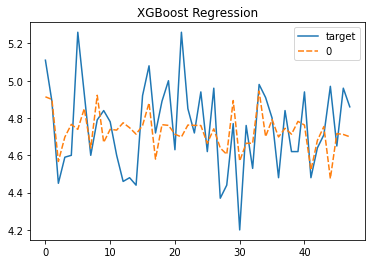

In [98]:
plot_xgb= pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),pd.DataFrame(y_pred_test_xgb)],axis=1)
sns.lineplot(data=plot_xgb)
plt.title('XGBoost Regression')

#### 4. AdaBoost Regression

In [78]:
param_grid_ada = {'n_estimators': [10, 20, 30, 50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.7, 1, 2, 3, 5, 7], 'loss' : ['linear', 'square', 'exponential']}

ada_gridcv = TuneSearchCV(estimator=AdaBoostRegressor(random_state=42), param_distributions=param_grid_ada)

ada_gridcv.fit(X_train_final, y_train)

print(ada_gridcv.best_params_)

(_Trainable pid=10160) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=10160)   warnings.warn(
(_Trainable pid=36888) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=36888)   warnings.warn(
(_Trainable pid=10160) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
(_Trainable pid=10160)   warnings.warn(
(_Trainable pid=10160) c:\Users\radya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only

{'n_estimators': 200, 'learning_rate': 1, 'loss': 'exponential'}


In [102]:
# Defining model using AdaBoost Regressor
ada = AdaBoostRegressor(n_estimators = 50, learning_rate = 0.7, loss = 'linear')

In [103]:
ada.fit(X_train_final, y_train)

AdaBoostRegressor(learning_rate=0.7)

In [104]:
y_pred_train_ada = ada.predict(X_train_final)
y_pred_test_ada = ada.predict(X_test_final)

print('MAE Train = ', mean_absolute_error(y_train, y_pred_train_ada))
print('MAE Test = ', mean_absolute_error(y_test, y_pred_test_ada))
print('')
print('MSE Train = ', mean_squared_error(y_train, y_pred_train_ada))
print('MSE Test = ', mean_squared_error(y_test, y_pred_test_ada))
print('')
print('RMSE Train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_ada)))
print('RMSE Test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_ada)))

MAE Train =  0.09846076464265092
MAE Test =  0.16485615813204105

MSE Train =  0.012351602989714137
MSE Test =  0.04159964884711336

RMSE Train =  0.11113776581214029
RMSE Test =  0.20395991970755764


The AdaBoost Regressor has a RMSE score of 0.204. Random Forest regressor is still the best.

Text(0.5, 1.0, 'AdaBoost Regressor')

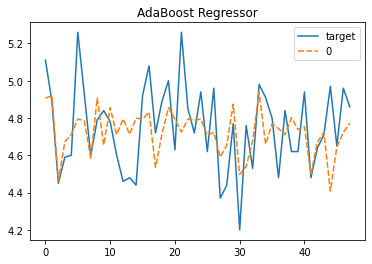

In [82]:
plot_ada= pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),pd.DataFrame(y_pred_test_ada)],axis=1)
sns.lineplot(data=plot_ada)
plt.title('AdaBoost Regressor')

#### 5. LightGBM Regressor

In [43]:
param_grid_lgbm = {'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7, 10], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 0.9, 1],
'num_leaves': [4, 14, 34, 64, 100], 'n_estimators': [10, 20, 30, 50, 100, 200, 300]}

lgbm_gridcv = TuneSearchCV(estimator=LGBMRegressor(random_state=42), param_distributions=param_grid_lgbm)

lgbm_gridcv.fit(X_train_final, y_train)

print(lgbm_gridcv.best_params_)

{'max_depth': -1, 'learning_rate': 0.1, 'num_leaves': 14, 'n_estimators': 50}


In [44]:
# Defining model using LightGBM Regressor
lgbm = LGBMRegressor(max_depth = -1, learning_rate = 0.1, num_leaves = 14, n_estimators = 50)

In [45]:
lgbm.fit(X_train_final, y_train)

LGBMRegressor(n_estimators=50, num_leaves=14)

In [46]:
y_pred_train_lgbm = lgbm.predict(X_train_final)
y_pred_test_lgbm = lgbm.predict(X_test_final)

print('MAE Train = ', mean_absolute_error(y_train, y_pred_train_lgbm))
print('MAE Test = ', mean_absolute_error(y_test, y_pred_test_lgbm))
print('')
print('MSE Train = ', mean_squared_error(y_train, y_pred_train_lgbm))
print('MSE Test = ', mean_squared_error(y_test, y_pred_test_lgbm))
print('')
print('RMSE Train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_lgbm)))
print('RMSE Test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm)))

MAE Train =  0.10608026014432385
MAE Test =  0.1683214655340228

MSE Train =  0.01776877089191208
MSE Test =  0.04550552630471629

RMSE Train =  0.13329955323222983
RMSE Test =  0.21332024354176116


The LightGBM Regressor has a RMSE score of 0.213, the worst amongst the five models we are using. Therefore, Random Forest regressor remains the best.

Text(0.5, 1.0, 'LightGBM Regressor')

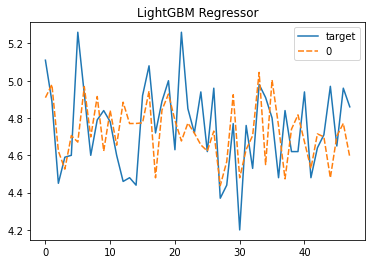

In [42]:
plot_lgbm= pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),pd.DataFrame(y_pred_test_lgbm)],axis=1)
sns.lineplot(data=plot_lgbm)
plt.title('LightGBM Regressor')

### e. Model Deployment

We will be creating a pipeline that will be used in the deployment of the model.

In [ ]:
# Redefining Numerical and Categorical columns.
num_col = X_train_scaled.columns.values
cat_col = X_train_encoded.columns.values

# Creating individual Scaling and Encoding processes inside the Pipeline.
num_pipe = Pipeline([
    ('scaling',MinMaxScaler())])

cat_pipe = Pipeline([
    ('encode',OneHotEncoder(handle_unknown='ignore'))])

# Defining preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num',num_pipe,num_col),
    ('cat',cat_pipe,cat_col)], remainder='passthrough')
    
# Choosing Model
model_name = RandomForestRegressor(n_estimators = 200, max_depth = 3, max_features = 'sqrt', min_samples_leaf = 6, random_state=42)

# Combining preprocessor and model into final pipeline
pipe_model = make_pipeline(preprocessor,model_name)

pipe_model.fit(X_train, y_train)

The model will now be saved to be used in the deployment process.

In [70]:
# Saving pipeline for deployment purposes
pickle.dump(pipe_model, open('rs_aria_model.pkl', 'wb'))

## IV. Conclusion and Further Improvements

To recall, the objective of this notebook is to create a regression machine learning model to predict on plant nutritional data. In conclusion, the Random Forest Regressor is the best model with RMSE of 0.199, whilst LightGBM is the worst at RMSE of 0.213. 

Decision Tree Regressor Model:
- RMSE Score is 0.206

Random Forest Regressor Model:
- RMSE Score is 0.196

XGBoost Regression Model:
- RMSE Score is 0.206

AdaBoost Regression Model:
- RMSE Score is 0.204

LightGBM Regressor Model:
- RMSE Score is 0.213

Further improvements could be done to the overall performance of our models, considering how relatively significant the RMSE can be. The range of such improvements stretch far and should not be focused on the modelling alone. As such, this is the outline of some of the things that could be done to better the model:

- Further Data Exploration

We could persue to do even more exploration regarding the information from the dataset to help with the feature selection. However, with a relatively small dataset size, we may have already explored all the options here.

- Improvement to Feature Selection

Several other methods could be further researched for the ascertainment of Feature Importance, besides the heatmap and K-Best score methods we have used.
In addition, we could consider applying PCA to find out how many features hold the most information.

- Additional System Tuning

We could do additional hyperparameter tuning in order to find maximum model performance. 

- Exploring Other Models

Models used so far have ranged of that from the Linear Regression group (not included in this notebook), Gaussian Process regression (not included here as well), Tree-Based regressors, Ensemble Models, and Boosted Tree Regressors. With that in mind, further exploration could be done that may improve accuracy of our predictions. The SARIMAX model, for example, comes in mind as it may be adapted to the problem found here.